### Counting number of cells - Computer Vision 2023

This code is used to count the number of cells of a video of cells in microdroplets. Then using background subtraction algorithms and other algorithms to count the cells in each droplet.

Notes for use:
Video should be provided in .tif format
The ouput gives an image of the background/foreground mask as well as the count of cells in each droplet.

Created by Turlagh Clancy - 18/10/2023

Update log:

In [1]:
# Base code
#1. Upload the tif file - done
#2. do background subtraction algorithm (as a function) - done
#3. Visualise background subtraction algorithm  - done

#Improvements
#4. Find better background frame to initialise
#5. find better way to update background
#6. Find a better background subtraction method, compare computation times, discuss quantitative assesments

#Later part 2.2
#7. import cell counts and boxes - 
#8. use algorithm to count cells in each box - have multiple methods
#9. Work on other counting methods, and compare them

In [2]:
#import libraries

import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


import matplotlib.animation as mat_anim
from IPython.display import HTML

In [4]:
# Function to present the Original and BGS frames side by side for visualisation. Created by Benoit Lu and given permission to use here on 18/10/2023
def draw_frames(frames, bgs_frames):
    if len(frames) != len(bgs_frames):
        raise Exception("The number of frames on each array doesn't match.")
    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    plt.tight_layout()

    def update(frame):
        plt.suptitle(f"Frame {frame}")
        axs[0].clear() 
        axs[1].clear()  
        axs[0].set_title("Original")
        axs[0].imshow(frames[frame], cmap='gray')  
        axs[1].set_title("BGS")
        axs[1].imshow(bgs_frames[frame], cmap='gray') 
        return axs

    return mat_anim.FuncAnimation(fig=fig, func=update, frames=len(frames), interval=500)

def process_TIF(filepath): # Function to get from tif file to grayscale image, maybe should change imread to only get grayscale
    #tif file to RGB numpy array
    array = tiff.imread(filepath)
    #convert to greyscale
    gray_arr = np.dot(array[...,:3], [0.2989, 0.5870, 0.1140])
    return gray_arr


In [5]:
def simple_background_subtraction(frames, threshold=30, learning_rate = 0.05):
    # Initialise array for the foreground
    num_frames, width, height = frames.shape
    grayscale_masks = np.zeros((num_frames, width, height), dtype=np.uint8)

    # Use the first frame as the initial background frame, to be changed later
    background_frame = np.ones((width, height), dtype=float)

    # Loop through each frame and compare it to the background frame
    for frame_num in range(0, num_frames):
        current_frame = frames[frame_num]

        # Calculate the difference between frame and background
        frame_diff = np.abs(current_frame - background_frame)
        grayscale_mask = (frame_diff > threshold).astype(np.uint8) * 255

        # Update the background frame 
        background_frame = (1 - learning_rate) * background_frame + learning_rate * current_frame

        # Store the inverted grayscale mask in the result (foreground is black, background is white)
        grayscale_masks[frame_num] = 255 - grayscale_mask

    return grayscale_masks


In [6]:
# Load data
seq41 = process_TIF("4-1.tif")
seq41 = seq41[:20]

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


In [7]:
%%time

#perform background subtraction and time it
bgs41 = simple_background_subtraction(seq41)

CPU times: total: 797 ms
Wall time: 1.88 s


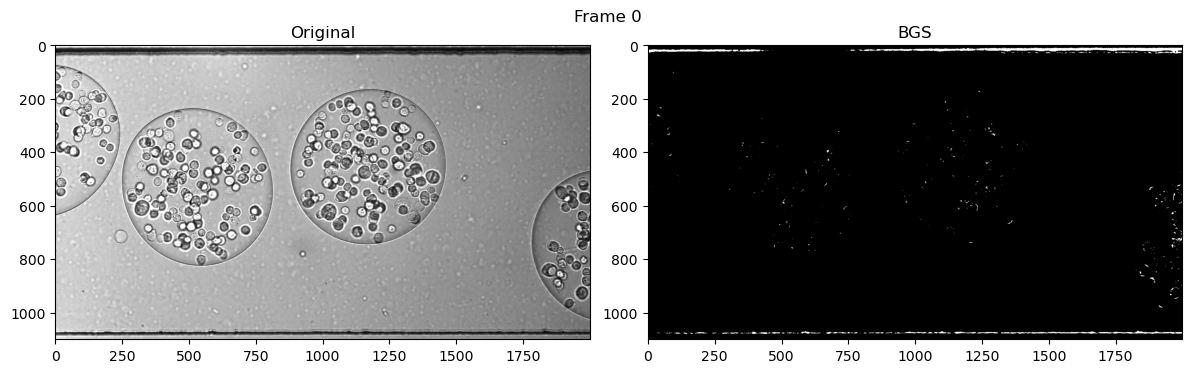

In [8]:
# Display the original side by side with the foreground masks
animation = draw_frames(seq41[:20], bgs41[:20])
HTML(animation.to_html5_video())